In [1]:
import os
import pandas as pd
import tensorflow as tf
import subprocess
import pickle
import datetime
import matplotlib.pyplot as plt
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
from train import train_lnphi


In [2]:

# Load and prepare training data
LNPHI_PATH = r"E:\Datasets"
datafile_name = r"nC9_data_C3-nC9_T300-650_P5-100_x0-1_20201008-163418.csv"
# nC10_data_nC4-nC10_PTx_range_20200822-113453.csv
log_save_dir = r"C:\Users\win7\Desktop\logs"

tr = train_lnphi()
tr.load_lnphi_data(LNPHI_PATH, datafile_name)
#tr.lnphi_range(-10, 10)
tr.split_data()
tr.feature_eng()

Loading done. Shape: (30902322, 5)
Splitting done.
Feature Eng done.


In [3]:
list(tr.X_train)

['a_mix', 'b_mix', 'b_i', 'sum']

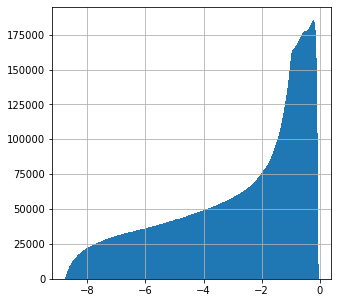

In [4]:
tr.lnphi['lnphi'].hist(bins=500, figsize=(5,5))
plt.show()

In [5]:
tr.lnphi['lnphi'].describe()

count    3.090232e+07
mean    -2.801187e+00
std      2.315247e+00
min     -8.767753e+00
25%     -4.449698e+00
50%     -2.070322e+00
75%     -8.356436e-01
max     -3.135986e-02
Name: lnphi, dtype: float64

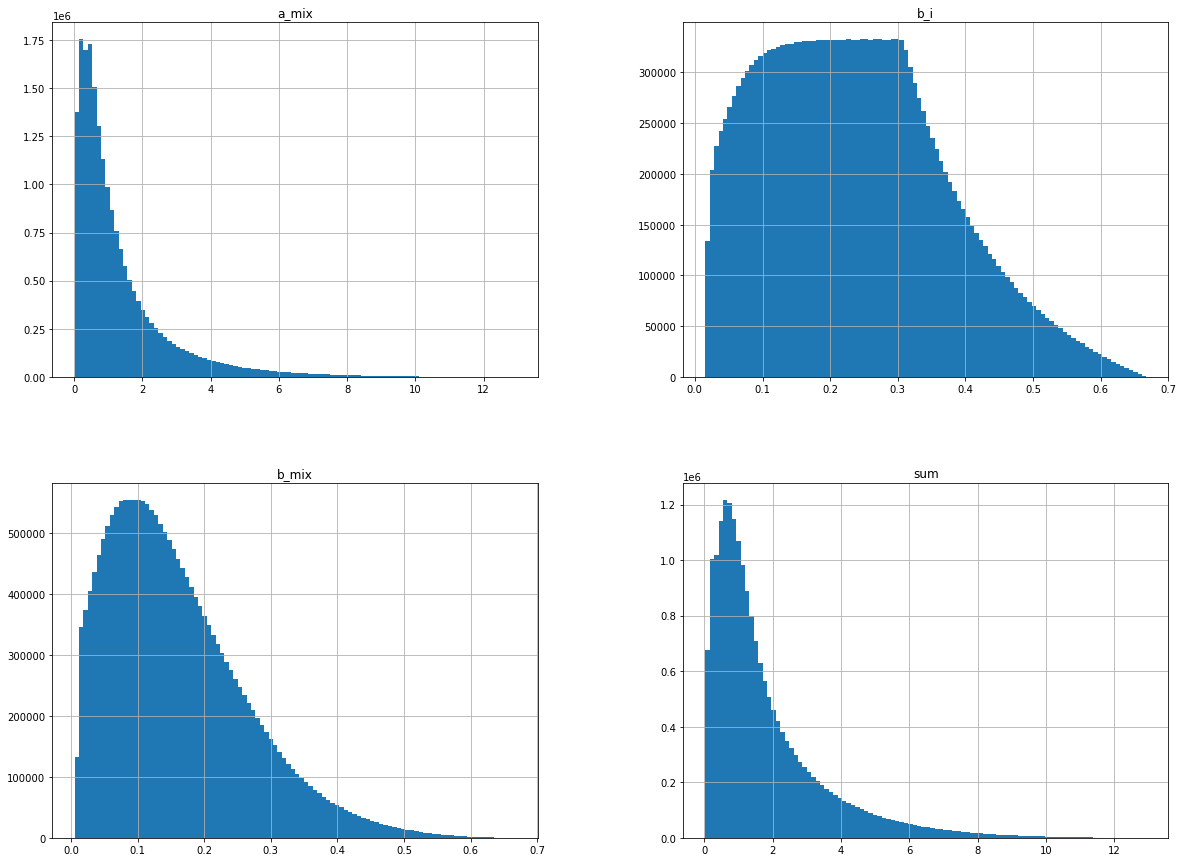

In [6]:
# Note: Histogram may have empty bins. This is an effect of bin resolution, and does not necessarily mean
# the distribution has a gap.
import matplotlib.pyplot as plt
d = pd.DataFrame(tr.X_train, columns=list(tr.X_train))
d.hist(bins=100, figsize=(20,15))
plt.show()

In [7]:
d.describe()

,a_mix,b_mix,b_i,sum
count,1.977748e+07,1.977748e+07,1.977748e+07,1.977748e+07
mean,1.322979e+00,1.597682e-01,2.385342e-01,1.792230e+00
std,1.424634e+00,1.036052e-01,1.334478e-01,1.661545e+00
min,1.129089e-02,5.217850e-03,1.540456e-02,2.923368e-02
25%,4.074289e-01,7.995010e-02,1.308449e-01,6.632402e-01
50%,8.445783e-01,1.403166e-01,2.282387e-01,1.252248e+00
75%,1.686469e+00,2.195556e-01,3.265190e-01,2.358140e+00
max,1.293889e+01,6.675307e-01,6.675307e-01,1.293889e+01


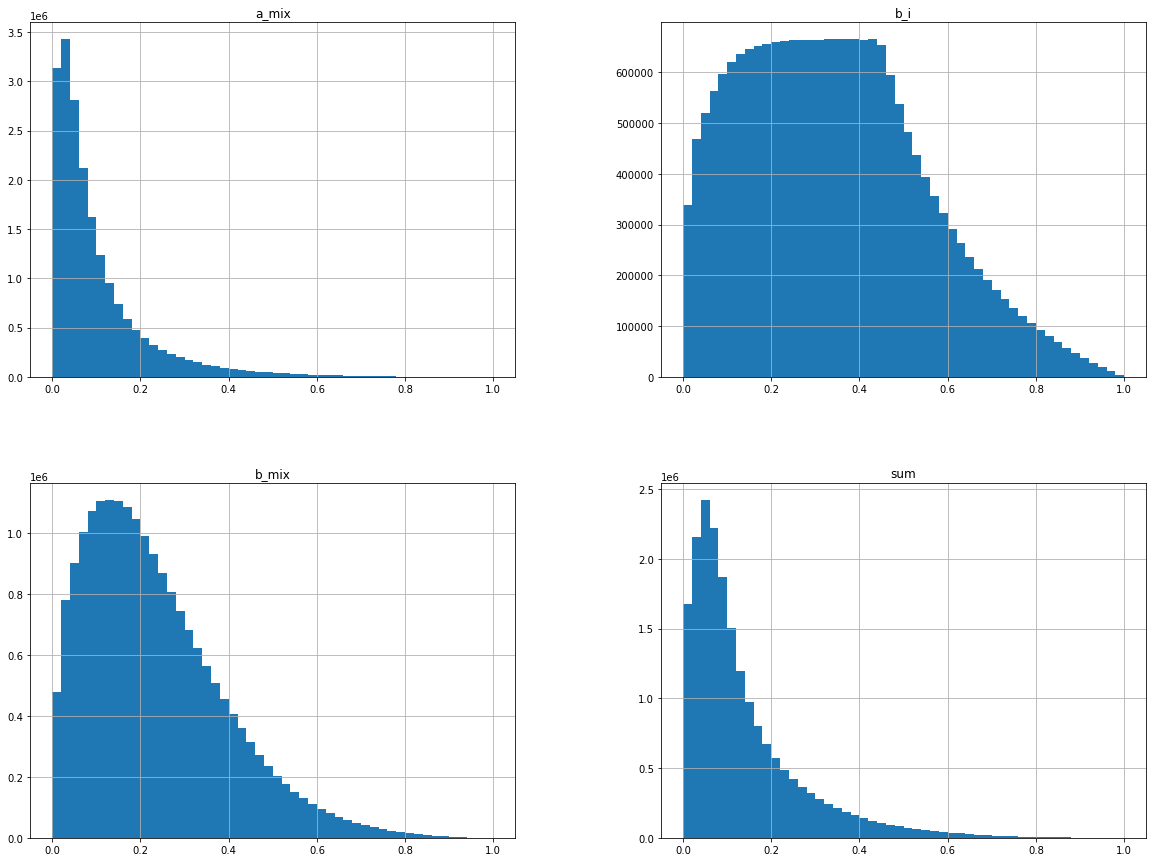

In [8]:
import matplotlib.pyplot as plt
d2 = pd.DataFrame(tr.X_train_prepared, columns=list(tr.X_train))
d2.hist(bins=50, figsize=(20,15))
plt.show()

In [9]:
'''d2.describe()'''

'd2.describe()'

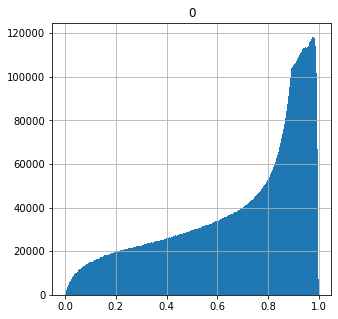

In [10]:

d3 = pd.DataFrame(tr.y_train_prepared)
d3.hist(bins=500, figsize=(5,5))
plt.show()

In [11]:
d3.describe()

,0
count,1.977748e+07
mean,6.828857e-01
std,2.650618e-01
min,0.000000e+00
25%,4.941768e-01
50%,7.665140e-01
75%,9.079361e-01
max,1.000000e+00


In [12]:
'''# Load model
tr.model = tf.keras.models.load_model(
    r'C:\Users\win7\Desktop\logs\logs\scalars\norm_all_512_3_40_50_20200808-144642\norm_all_4096_3_40_250_20200810-195701')
# Give existing log directory
tr.logdir = r'C:\Users\win7\Desktop\logs\logs\scalars\norm_all_512_3_40_50_20200808-144642'
tr.model.summary()'''


SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 60-61: truncated \UXXXXXXXX escape (<ipython-input-12-3a1e41393f49>, line 6)

In [13]:
# Train
name_prefix = 'lnphi_nC9_T300-600_P5-100_'
batch_size = 100
n_layers = 4
n_nodes = 20
epochs = 100
initial_epoch = 0 # 0 if new model

tr.model_construct(n_layers, n_nodes)
tr.train_model(batch_size, n_layers, n_nodes, epochs, initial_epoch, log_save_dir, name_prefix)

New logdir created.
Train on 19777485 samples, validate on 4944372 samples
Epoch 1/100

Epoch 00001: mse improved from inf to 0.00012, saving model to C:\Users\win7\Desktop\logs.\logs\scalars\lnphi_nC9_T300-600_P5-100__100_4_20_100_20201021-232924
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: C:\Users\win7\Desktop\logs.\logs\scalars\lnphi_nC9_T300-600_P5-100__100_4_20_100_20201021-232924\assets
19777485/19777485 - 305s - loss: 1.2027e-04 - mse: 1.2026e-04 - mae: 0.0033 - mean_absolute_percentage_error: 1.4750 - val_loss: 4.6901e-06 - val_mse: 4.6902e-06 - val_mae: 0.0016 - val_mean_absolute_percentage_error: 0.9054
Epoch 2/100

Epoch 00002: mse improved from 0.00012 to 0.00001, saving model to C:\Users\win7\Desktop\logs.\logs\scalars\lnphi_nC9_T300-600_P5-100__100_4_20_100_20201021-232924
INFO:tensorflow:Assets written to: C:\Users\win7\Desktop\logs.\logs\scalars\lnphi_nC9_T300-600_P5-100__100_4_20_100_20201021-23292

INFO:tensorflow:Assets written to: C:\Users\win7\Desktop\logs.\logs\scalars\lnphi_nC9_T300-600_P5-100__100_4_20_100_20201021-232924\assets
19777485/19777485 - 299s - loss: 1.8456e-06 - mse: 1.8456e-06 - mae: 8.0889e-04 - mean_absolute_percentage_error: 0.6304 - val_loss: 4.9811e-07 - val_mse: 4.9812e-07 - val_mae: 5.3596e-04 - val_mean_absolute_percentage_error: 0.3483
Epoch 16/100

Epoch 00016: mse improved from 0.00000 to 0.00000, saving model to C:\Users\win7\Desktop\logs.\logs\scalars\lnphi_nC9_T300-600_P5-100__100_4_20_100_20201021-232924
INFO:tensorflow:Assets written to: C:\Users\win7\Desktop\logs.\logs\scalars\lnphi_nC9_T300-600_P5-100__100_4_20_100_20201021-232924\assets
19777485/19777485 - 293s - loss: 1.8087e-06 - mse: 1.8087e-06 - mae: 7.9652e-04 - mean_absolute_percentage_error: 0.7363 - val_loss: 2.1737e-06 - val_mse: 2.1737e-06 - val_mae: 9.4696e-04 - val_mean_absolute_percentage_error: 0.6569
Epoch 17/100

Epoch 00017: mse improved from 0.00000 to 0.00000, saving model 

Epoch 31/100

Epoch 00031: mse improved from 0.00000 to 0.00000, saving model to C:\Users\win7\Desktop\logs.\logs\scalars\lnphi_nC9_T300-600_P5-100__100_4_20_100_20201021-232924
INFO:tensorflow:Assets written to: C:\Users\win7\Desktop\logs.\logs\scalars\lnphi_nC9_T300-600_P5-100__100_4_20_100_20201021-232924\assets
19777485/19777485 - 338s - loss: 1.2962e-06 - mse: 1.2962e-06 - mae: 6.7812e-04 - mean_absolute_percentage_error: 0.3698 - val_loss: 4.7697e-07 - val_mse: 4.7697e-07 - val_mae: 4.5667e-04 - val_mean_absolute_percentage_error: 0.3641
Epoch 32/100

Epoch 00032: mse improved from 0.00000 to 0.00000, saving model to C:\Users\win7\Desktop\logs.\logs\scalars\lnphi_nC9_T300-600_P5-100__100_4_20_100_20201021-232924
INFO:tensorflow:Assets written to: C:\Users\win7\Desktop\logs.\logs\scalars\lnphi_nC9_T300-600_P5-100__100_4_20_100_20201021-232924\assets
19777485/19777485 - 339s - loss: 1.2902e-06 - mse: 1.2902e-06 - mae: 6.7722e-04 - mean_absolute_percentage_error: 0.6523 - val_loss: 

Epoch 51/100

Epoch 00051: mse did not improve from 0.00000
19777485/19777485 - 283s - loss: 1.1392e-06 - mse: 1.1392e-06 - mae: 6.3508e-04 - mean_absolute_percentage_error: 0.5479 - val_loss: 4.6713e-07 - val_mse: 4.6713e-07 - val_mae: 5.0021e-04 - val_mean_absolute_percentage_error: 0.5112
Epoch 52/100

Epoch 00052: mse did not improve from 0.00000
19777485/19777485 - 283s - loss: 1.1083e-06 - mse: 1.1083e-06 - mae: 6.3302e-04 - mean_absolute_percentage_error: 0.6635 - val_loss: 2.2936e-06 - val_mse: 2.2936e-06 - val_mae: 9.7022e-04 - val_mean_absolute_percentage_error: 0.7318
Epoch 53/100

Epoch 00053: mse improved from 0.00000 to 0.00000, saving model to C:\Users\win7\Desktop\logs.\logs\scalars\lnphi_nC9_T300-600_P5-100__100_4_20_100_20201021-232924
INFO:tensorflow:Assets written to: C:\Users\win7\Desktop\logs.\logs\scalars\lnphi_nC9_T300-600_P5-100__100_4_20_100_20201021-232924\assets
19777485/19777485 - 285s - loss: 1.0832e-06 - mse: 1.0832e-06 - mae: 6.2736e-04 - mean_absolute_p

Epoch 70/100

Epoch 00070: mse did not improve from 0.00000
19777485/19777485 - 282s - loss: 9.6530e-07 - mse: 9.6530e-07 - mae: 5.8454e-04 - mean_absolute_percentage_error: 0.5762 - val_loss: 9.3911e-07 - val_mse: 9.3911e-07 - val_mae: 6.0034e-04 - val_mean_absolute_percentage_error: 0.3646
Epoch 71/100

Epoch 00071: mse improved from 0.00000 to 0.00000, saving model to C:\Users\win7\Desktop\logs.\logs\scalars\lnphi_nC9_T300-600_P5-100__100_4_20_100_20201021-232924
INFO:tensorflow:Assets written to: C:\Users\win7\Desktop\logs.\logs\scalars\lnphi_nC9_T300-600_P5-100__100_4_20_100_20201021-232924\assets
19777485/19777485 - 283s - loss: 9.2866e-07 - mse: 9.2866e-07 - mae: 5.7845e-04 - mean_absolute_percentage_error: 0.6271 - val_loss: 3.4319e-07 - val_mse: 3.4319e-07 - val_mae: 3.9174e-04 - val_mean_absolute_percentage_error: 0.6196
Epoch 72/100

Epoch 00072: mse did not improve from 0.00000
19777485/19777485 - 284s - loss: 9.5217e-07 - mse: 9.5218e-07 - mae: 5.8069e-04 - mean_absolute_p

19777485/19777485 - 283s - loss: 8.1768e-07 - mse: 8.1767e-07 - mae: 5.4781e-04 - mean_absolute_percentage_error: 0.3112 - val_loss: 2.5081e-07 - val_mse: 2.5081e-07 - val_mae: 3.7890e-04 - val_mean_absolute_percentage_error: 0.3230
Epoch 91/100

Epoch 00091: mse did not improve from 0.00000
19777485/19777485 - 282s - loss: 8.1875e-07 - mse: 8.1875e-07 - mae: 5.4882e-04 - mean_absolute_percentage_error: 0.5753 - val_loss: 1.0777e-06 - val_mse: 1.0777e-06 - val_mae: 6.9067e-04 - val_mean_absolute_percentage_error: 0.5938
Epoch 92/100

Epoch 00092: mse did not improve from 0.00000
19777485/19777485 - 282s - loss: 8.3783e-07 - mse: 8.3783e-07 - mae: 5.4867e-04 - mean_absolute_percentage_error: 0.3671 - val_loss: 1.1215e-05 - val_mse: 1.1215e-05 - val_mae: 0.0024 - val_mean_absolute_percentage_error: 1.8781
Epoch 93/100

Epoch 00093: mse did not improve from 0.00000
19777485/19777485 - 282s - loss: 8.2464e-07 - mse: 8.2464e-07 - mae: 5.4645e-04 - mean_absolute_percentage_error: 0.6167 - va

In [14]:
# Train
#name_prefix = 'lnphi_nC4_T300-600_P5-100_'
batch_size = 256
n_layers = 4
n_nodes = 20
epochs = 200
initial_epoch = 99 # 0 if new model

#tr.model_construct(n_layers, n_nodes)
tr.train_model(batch_size, n_layers, n_nodes, epochs, initial_epoch, log_save_dir, name_prefix)

Train on 19777485 samples, validate on 4944372 samples
Epoch 100/200

Epoch 00100: mse improved from inf to 0.00000, saving model to C:\Users\win7\Desktop\logs.\logs\scalars\lnphi_nC9_T300-600_P5-100__100_4_20_100_20201021-232924
INFO:tensorflow:Assets written to: C:\Users\win7\Desktop\logs.\logs\scalars\lnphi_nC9_T300-600_P5-100__100_4_20_100_20201021-232924\assets
19777485/19777485 - 132s - loss: 4.3154e-07 - mse: 4.3154e-07 - mae: 4.0812e-04 - mean_absolute_percentage_error: 0.4433 - val_loss: 1.5071e-07 - val_mse: 1.5071e-07 - val_mae: 2.7132e-04 - val_mean_absolute_percentage_error: 0.2644
Epoch 101/200

Epoch 00101: mse improved from 0.00000 to 0.00000, saving model to C:\Users\win7\Desktop\logs.\logs\scalars\lnphi_nC9_T300-600_P5-100__100_4_20_100_20201021-232924
INFO:tensorflow:Assets written to: C:\Users\win7\Desktop\logs.\logs\scalars\lnphi_nC9_T300-600_P5-100__100_4_20_100_20201021-232924\assets
19777485/19777485 - 124s - loss: 4.3018e-07 - mse: 4.3018e-07 - mae: 4.0690e-04 

Epoch 123/200

Epoch 00123: mse did not improve from 0.00000
19777485/19777485 - 123s - loss: 4.1519e-07 - mse: 4.1519e-07 - mae: 3.9497e-04 - mean_absolute_percentage_error: 0.5492 - val_loss: 2.6802e-07 - val_mse: 2.6802e-07 - val_mae: 4.1210e-04 - val_mean_absolute_percentage_error: 0.2265
Epoch 124/200

Epoch 00124: mse did not improve from 0.00000
19777485/19777485 - 123s - loss: 4.3536e-07 - mse: 4.3536e-07 - mae: 3.9785e-04 - mean_absolute_percentage_error: 0.1839 - val_loss: 2.2180e-07 - val_mse: 2.2180e-07 - val_mae: 3.6534e-04 - val_mean_absolute_percentage_error: 0.1712
Epoch 125/200

Epoch 00125: mse did not improve from 0.00000
19777485/19777485 - 123s - loss: 4.0967e-07 - mse: 4.0967e-07 - mae: 3.9622e-04 - mean_absolute_percentage_error: 0.6351 - val_loss: 1.8956e-07 - val_mse: 1.8956e-07 - val_mae: 3.3542e-04 - val_mean_absolute_percentage_error: 0.1570
Epoch 126/200

Epoch 00126: mse did not improve from 0.00000
19777485/19777485 - 123s - loss: 4.1488e-07 - mse: 4.1488

Epoch 149/200

Epoch 00149: mse did not improve from 0.00000
19777485/19777485 - 122s - loss: 3.9737e-07 - mse: 3.9737e-07 - mae: 3.9188e-04 - mean_absolute_percentage_error: 0.3982 - val_loss: 5.3955e-07 - val_mse: 5.3956e-07 - val_mae: 5.5972e-04 - val_mean_absolute_percentage_error: 0.2763
Epoch 150/200

Epoch 00150: mse did not improve from 0.00000
19777485/19777485 - 123s - loss: 4.0374e-07 - mse: 4.0374e-07 - mae: 3.9056e-04 - mean_absolute_percentage_error: 0.2163 - val_loss: 2.1863e-07 - val_mse: 2.1863e-07 - val_mae: 3.6426e-04 - val_mean_absolute_percentage_error: 0.2008
Epoch 151/200

Epoch 00151: mse did not improve from 0.00000
19777485/19777485 - 123s - loss: 3.9625e-07 - mse: 3.9625e-07 - mae: 3.8829e-04 - mean_absolute_percentage_error: 0.2068 - val_loss: 2.1588e-07 - val_mse: 2.1588e-07 - val_mae: 3.3648e-04 - val_mean_absolute_percentage_error: 0.1903
Epoch 152/200

Epoch 00152: mse did not improve from 0.00000
19777485/19777485 - 122s - loss: 4.1367e-07 - mse: 4.1368

19777485/19777485 - 124s - loss: 3.6961e-07 - mse: 3.6961e-07 - mae: 3.8382e-04 - mean_absolute_percentage_error: 0.2983 - val_loss: 1.5104e-06 - val_mse: 1.5104e-06 - val_mae: 9.0448e-04 - val_mean_absolute_percentage_error: 0.5452
Epoch 177/200

Epoch 00177: mse did not improve from 0.00000
19777485/19777485 - 123s - loss: 3.8846e-07 - mse: 3.8846e-07 - mae: 3.8523e-04 - mean_absolute_percentage_error: 0.4590 - val_loss: 2.3662e-07 - val_mse: 2.3662e-07 - val_mae: 3.3106e-04 - val_mean_absolute_percentage_error: 0.2637
Epoch 178/200

Epoch 00178: mse did not improve from 0.00000
19777485/19777485 - 123s - loss: 3.9411e-07 - mse: 3.9411e-07 - mae: 3.8573e-04 - mean_absolute_percentage_error: 0.2900 - val_loss: 1.7070e-07 - val_mse: 1.7070e-07 - val_mae: 2.7109e-04 - val_mean_absolute_percentage_error: 0.2750
Epoch 179/200

Epoch 00179: mse did not improve from 0.00000
19777485/19777485 - 123s - loss: 3.8956e-07 - mse: 3.8956e-07 - mae: 3.8650e-04 - mean_absolute_percentage_error: 0.25

In [15]:
# Train
#name_prefix = 'lnphi_nC4_T300-600_P5-100_'
batch_size = 512
n_layers = 4
n_nodes = 20
epochs = 250
initial_epoch = 199 # 0 if new model

#tr.model_construct(n_layers, n_nodes)
tr.train_model(batch_size, n_layers, n_nodes, epochs, initial_epoch, log_save_dir, name_prefix)

Train on 19777485 samples, validate on 4944372 samples
Epoch 200/250

Epoch 00200: mse improved from inf to 0.00000, saving model to C:\Users\win7\Desktop\logs.\logs\scalars\lnphi_nC9_T300-600_P5-100__100_4_20_100_20201021-232924
INFO:tensorflow:Assets written to: C:\Users\win7\Desktop\logs.\logs\scalars\lnphi_nC9_T300-600_P5-100__100_4_20_100_20201021-232924\assets
19777485/19777485 - 71s - loss: 2.5106e-07 - mse: 2.5106e-07 - mae: 3.3157e-04 - mean_absolute_percentage_error: 0.3518 - val_loss: 3.5744e-07 - val_mse: 3.5744e-07 - val_mae: 4.9216e-04 - val_mean_absolute_percentage_error: 0.3087
Epoch 201/250

Epoch 00201: mse did not improve from 0.00000
19777485/19777485 - 68s - loss: 2.5517e-07 - mse: 2.5517e-07 - mae: 3.3175e-04 - mean_absolute_percentage_error: 0.2751 - val_loss: 4.5430e-07 - val_mse: 4.5430e-07 - val_mae: 4.9528e-04 - val_mean_absolute_percentage_error: 0.4017
Epoch 202/250

Epoch 00202: mse did not improve from 0.00000
19777485/19777485 - 68s - loss: 2.6205e-07 - 


Epoch 00226: mse did not improve from 0.00000
19777485/19777485 - 68s - loss: 2.5527e-07 - mse: 2.5527e-07 - mae: 3.2760e-04 - mean_absolute_percentage_error: 0.1753 - val_loss: 1.2593e-07 - val_mse: 1.2593e-07 - val_mae: 2.4083e-04 - val_mean_absolute_percentage_error: 0.1546
Epoch 227/250

Epoch 00227: mse did not improve from 0.00000
19777485/19777485 - 68s - loss: 2.5874e-07 - mse: 2.5874e-07 - mae: 3.3049e-04 - mean_absolute_percentage_error: 0.3657 - val_loss: 1.1132e-07 - val_mse: 1.1132e-07 - val_mae: 2.3332e-04 - val_mean_absolute_percentage_error: 0.1778
Epoch 228/250

Epoch 00228: mse did not improve from 0.00000
19777485/19777485 - 68s - loss: 2.6110e-07 - mse: 2.6110e-07 - mae: 3.2820e-04 - mean_absolute_percentage_error: 0.3056 - val_loss: 1.3259e-07 - val_mse: 1.3259e-07 - val_mae: 2.5903e-04 - val_mean_absolute_percentage_error: 0.2332
Epoch 229/250

Epoch 00229: mse did not improve from 0.00000
19777485/19777485 - 68s - loss: 2.5093e-07 - mse: 2.5093e-07 - mae: 3.2785